<center><h3>Practice Lab: Confusion Matrix</h3></center>
<p style='text-align:center'>Sona Mathew<br>
2448061</p>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [35]:
df = pd.read_csv(r"c:\Users\sonam\Downloads\Titanic-Dataset.csv")

In [36]:
# Display first few rows
display(df.head())

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\sonam\AppData\Local\Temp\ipykernel_33464\3649554841.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [38]:
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
else:
    print("Column 'Embarked' not found in dataset")


# Convert categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [39]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Choose classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC()
}

In [41]:
# Train models and evaluate
results = {}
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    print(f'\n{name} Classification Report:\n', classification_report(y_test, y_pred))

c:\Users\sonam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.68      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       

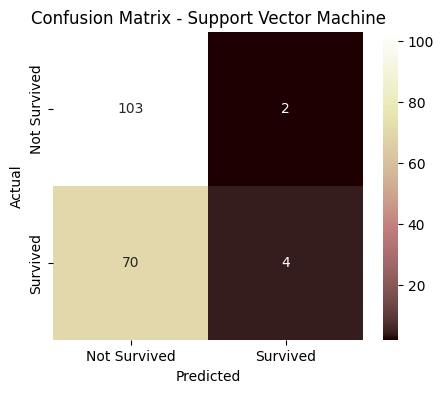

In [42]:
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [31]:
print("\nModel Comparison:")
for model, metrics in results.items():
    rounded_metrics = {key: round(value, 2) for key, value in metrics.items()}  
    print(f"{model}: {rounded_metrics}")



Model Comparison:
Logistic Regression: {'Accuracy': 0.77, 'Precision': 0.75, 'Recall': 0.68, 'F1 Score': 0.71}
Random Forest: {'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.73, 'F1 Score': 0.77}
Support Vector Machine: {'Accuracy': 0.6, 'Precision': 0.67, 'Recall': 0.05, 'F1 Score': 0.1}


<b>INTERPRETATION</b><br>

Random Forest is the best classifier because:<br>
It has the highest accuracy (82%).<br>
It balances precision (81%) and recall0 (73%) well.<br>
It outperforms Logistic Regression and SVM in all key metrics.<br><br>

SVM is the worst because:<br>
Low recall (0.05) → It fails to detect most survivors.<br>
Low F1-score (0.1) → Performs poorly overall.<br>